In [2]:
import re
import dateutil
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
''' open() takes 3 arguments
    r is used to read a file
    w is used to write a file'''

with open('WhatsApp Chat with AI6 Abuja.txt','r', encoding="utf8") as file:
    data_file = file.read()
    print(data_file)

1/30/19, 12:36 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.
8/18/18, 5:05 PM - ‪+234 814 690 6131‬ created group "AI6 Abuja"
1/30/19, 12:36 PM - You joined using this group's invite link
1/30/19, 12:49 PM - ‪+234 807 823 6426‬ joined using this group's invite link
1/30/19, 1:11 PM - Mike AIML joined using this group's invite link
1/30/19, 1:45 PM - ‪+234 802 850 5287‬ joined using this group's invite link
1/30/19, 1:51 PM - ‪+234 705 303 0784‬ joined using this group's invite link
1/30/19, 3:13 PM - ‪+234 807 922 2806‬ joined using this group's invite link
1/30/19, 5:53 PM - ‪+234 806 274 4087‬ joined using this group's invite link
1/30/19, 6:14 PM - ‪+234 803 643 9442‬ joined using this group's invite link
1/30/19, 6:40 PM - ‪+234 907 322 3568‬ joined using this group's invite link
1/31/19, 12:46 AM - ‪+234 813 701 6073‬ joined using this group's invite link
1/31/19, 8:40 AM - ‪+234 803 200 8936‬ joined using this group's invite link
1/31/

In [12]:
data_found = re.findall('(\d+/\d+/\d+,\s+\d+\:\d+\s+\w+)\s+\-\s(\w+\s\w+\s\w+|\w+\s\w+|\w+)\:(.*)',data_file)
print (data_found)

[('1/31/19, 8:43 AM', 'PhileJohn', " Good morning, I joined this wonderful group a day ago, I don't know if the materials for the last Saturday cohort have been shared here?"), ('1/31/19, 10:47 AM', 'PhileJohn', ' 👍'), ('2/1/19, 9:43 AM', 'MickyBank AIML', ' Happy New Month Group. More knowledge of ML and AI fall on us in great heath and wealth.'), ('2/1/19, 10:43 AM', 'Simon AIML', ' Happy new month every body'), ('2/2/19, 9:58 AM', 'MickyBank AIML', ' https://gitexplorer.com'), ('2/2/19, 9:59 AM', 'MickyBank AIML', ' The above link is also a quick and easy guide on how to use Git'), ('2/2/19, 3:00 PM', 'Simon AIML', ' No hype on twitter????'), ('2/2/19, 5:40 PM', 'MickyBank AIML', ' Yes we do'), ('2/2/19, 5:40 PM', 'MickyBank AIML', ' @AbujaAi'), ('2/2/19, 5:44 PM', 'MickyBank AIML', ' UwC'), ('2/2/19, 5:45 PM', 'MickyBank AIML', ' None yet'), ('2/4/19, 9:48 AM', 'Simon AIML', ' makes a lot of sense'), ('2/4/19, 9:48 AM', 'Simon AIML', ' For we visual learners this is just awesome'),

In [13]:
data_f = pd.DataFrame(data_found, columns=['DateTime','Sender','Message'])
print (data_f)

              DateTime          Sender  \
0     1/31/19, 8:43 AM       PhileJohn   
1    1/31/19, 10:47 AM       PhileJohn   
2      2/1/19, 9:43 AM  MickyBank AIML   
3     2/1/19, 10:43 AM      Simon AIML   
4      2/2/19, 9:58 AM  MickyBank AIML   
5      2/2/19, 9:59 AM  MickyBank AIML   
6      2/2/19, 3:00 PM      Simon AIML   
7      2/2/19, 5:40 PM  MickyBank AIML   
8      2/2/19, 5:40 PM  MickyBank AIML   
9      2/2/19, 5:44 PM  MickyBank AIML   
10     2/2/19, 5:45 PM  MickyBank AIML   
11     2/4/19, 9:48 AM      Simon AIML   
12     2/4/19, 9:48 AM      Simon AIML   
13     2/6/19, 9:03 AM  MickyBank AIML   
14     2/6/19, 9:05 AM  MickyBank AIML   
15     2/6/19, 9:08 AM  MickyBank AIML   
16     2/6/19, 9:09 AM  MickyBank AIML   
17     2/6/19, 9:15 AM  MickyBank AIML   
18     2/6/19, 9:15 AM  MickyBank AIML   
19     2/6/19, 9:16 AM  MickyBank AIML   
20     2/6/19, 9:16 AM      Rihan A1ML   
21     2/6/19, 9:18 AM  MickyBank AIML   
22     2/6/19, 9:19 AM  MickyBank 

In [14]:
print (data_f.head(15))

             DateTime          Sender  \
0    1/31/19, 8:43 AM       PhileJohn   
1   1/31/19, 10:47 AM       PhileJohn   
2     2/1/19, 9:43 AM  MickyBank AIML   
3    2/1/19, 10:43 AM      Simon AIML   
4     2/2/19, 9:58 AM  MickyBank AIML   
5     2/2/19, 9:59 AM  MickyBank AIML   
6     2/2/19, 3:00 PM      Simon AIML   
7     2/2/19, 5:40 PM  MickyBank AIML   
8     2/2/19, 5:40 PM  MickyBank AIML   
9     2/2/19, 5:44 PM  MickyBank AIML   
10    2/2/19, 5:45 PM  MickyBank AIML   
11    2/4/19, 9:48 AM      Simon AIML   
12    2/4/19, 9:48 AM      Simon AIML   
13    2/6/19, 9:03 AM  MickyBank AIML   
14    2/6/19, 9:05 AM  MickyBank AIML   

                                              Message  
0    Good morning, I joined this wonderful group a...  
1                                                   👍  
2    Happy New Month Group. More knowledge of ML a...  
3                          Happy new month every body  
4                             https://gitexplorer.com  
5    Th

In [15]:
data_f.describe()

,DateTime,Sender,Message
count,359,359,359
unique,268,10,285
top,"3/16/19, 12:38 PM",MickyBank AIML,<Media omitted>
freq,16,176,50


<Figure size 1440x2160 with 0 Axes>

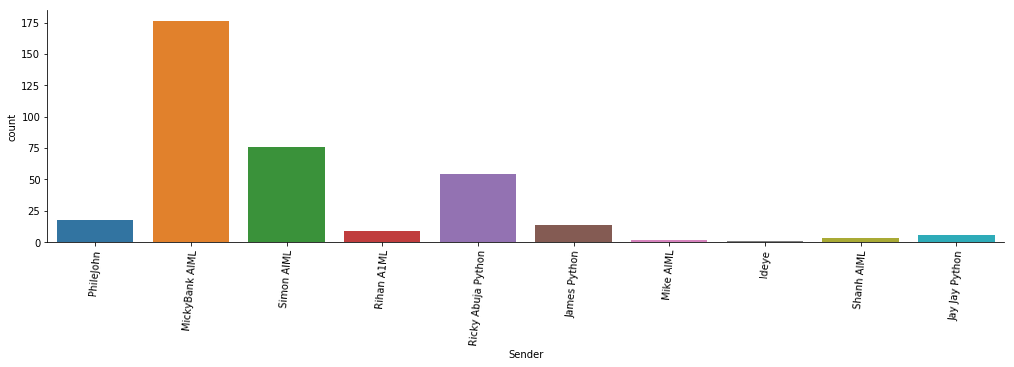

In [16]:
%matplotlib inline
plt.figure(figsize = (20, 30))
member_plot = sns.factorplot("Sender",data= data_f, aspect=3.5, kind="count")
member_plot.set_xticklabels(rotation=85)

In [20]:
MsgList = data_f['Message'].tolist() # Conver the message column of df to a list of words
MsgList

[" Good morning, I joined this wonderful group a day ago, I don't know if the materials for the last Saturday cohort have been shared here?",
 ' 👍',
 ' Happy New Month Group. More knowledge of ML and AI fall on us in great heath and wealth.',
 ' Happy new month every body',
 ' https://gitexplorer.com',
 ' The above link is also a quick and easy guide on how to use Git',
 ' No hype on twitter????',
 ' Yes we do',
 ' @AbujaAi',
 ' UwC',
 ' None yet',
 ' makes a lot of sense',
 ' For we visual learners this is just awesome',
 ' Open the link to the github page, copy the URL.',
 ' UwC',
 ' Nope.',
 ' cd means change directory example if its in your user, all you need do is type',
 ' Try \\cd',
 ' Just that line of code, I think it should take you to windows',
 ' You are in your program file bro',
 ' This message was deleted',
 ' Worked??',
 " Yeah that's what I saw",
 ' Ok',
 ' ✋🏾',
 ' 🤚🏼',
 ' Hello everyone, ',
 ' This message was deleted',
 ' <Media omitted>',
 ' while you are thinking, 

In [21]:
WordList = ' '.join(MsgList).lower().split()#Join the individual words together to for a string and properly split into individual words
WordList

['good',
 'morning,',
 'i',
 'joined',
 'this',
 'wonderful',
 'group',
 'a',
 'day',
 'ago,',
 'i',
 "don't",
 'know',
 'if',
 'the',
 'materials',
 'for',
 'the',
 'last',
 'saturday',
 'cohort',
 'have',
 'been',
 'shared',
 'here?',
 '👍',
 'happy',
 'new',
 'month',
 'group.',
 'more',
 'knowledge',
 'of',
 'ml',
 'and',
 'ai',
 'fall',
 'on',
 'us',
 'in',
 'great',
 'heath',
 'and',
 'wealth.',
 'happy',
 'new',
 'month',
 'every',
 'body',
 'https://gitexplorer.com',
 'the',
 'above',
 'link',
 'is',
 'also',
 'a',
 'quick',
 'and',
 'easy',
 'guide',
 'on',
 'how',
 'to',
 'use',
 'git',
 'no',
 'hype',
 'on',
 'twitter????',
 'yes',
 'we',
 'do',
 '@abujaai',
 'uwc',
 'none',
 'yet',
 'makes',
 'a',
 'lot',
 'of',
 'sense',
 'for',
 'we',
 'visual',
 'learners',
 'this',
 'is',
 'just',
 'awesome',
 'open',
 'the',
 'link',
 'to',
 'the',
 'github',
 'page,',
 'copy',
 'the',
 'url.',
 'uwc',
 'nope.',
 'cd',
 'means',
 'change',
 'directory',
 'example',
 'if',
 'its',
 'in',

In [22]:
word_freq_df = pd.DataFrame.from_dict(dict(Counter(WordList)), orient='index').reset_index() #Convert Wordlist to a dictionary then apply DataFrame.from_dict to convert to a Dataframe
word_freq_df

,index,0
0,good,6
1,"morning,",1
2,i,41
3,joined,1
4,this,18
5,wonderful,2
6,group,2
7,a,38
8,day,1
9,"ago,",1


In [27]:
word_freq_df.columns

Index(['index', 0], dtype='object')

In [29]:
word_freq_df.columns = ['index', 'Frequency']
word_freq_df

,index,Frequency
0,good,6
1,"morning,",1
2,i,41
3,joined,1
4,this,18
5,wonderful,2
6,group,2
7,a,38
8,day,1
9,"ago,",1


In [36]:
print(len(word_freq_df))

884


In [41]:
word_freq_df.columns =['Word','Count'] #Add colum to the dataframe

word_freq_df

,Word,Count
0,good,6
1,"morning,",1
2,i,41
3,joined,1
4,this,18
5,wonderful,2
6,group,2
7,a,38
8,day,1
9,"ago,",1


In [42]:
word_freq_df.loc[word_freq_df['Count'].idxmax()]

Word     the
Count     63
Name: 13, dtype: object

In [44]:
word_freq_df['Word'].replace(regex=True,inplace=True,to_replace=r'\d|\W|\?|http*',value=r'')

In [48]:
dropWords = ['','a','and','u','to','for','with','of','in','omitted','image', 'q'] #List of words to be dropped from the messages

In [49]:
word_freq_df['Word'].replace(dropWords, np.nan, inplace=True)#Replacing the dropped words with NAN values

word_freq_df

,Word,Count
0,good,6
1,morning,1
2,i,41
3,joined,1
4,this,18
5,wonderful,2
6,group,2
7,NaN,38
8,day,1
9,ago,1


In [51]:
word_freq_df.dropna(subset=['Word'], inplace=True) #dropna was used to drop the NAN(empty) values which became present after dropping some words
word_freq_df

,Word,Count
0,good,6
1,morning,1
2,i,41
3,joined,1
4,this,18
5,wonderful,2
6,group,2
8,day,1
9,ago,1
10,dont,4


In [53]:
word_freq_df.sort_values(by=['Count'],axis=0, ascending=False, inplace=True)#Sort the resulting data frame in descending order
word_freq_df

,Word,Count
13,the,63
117,media,50
2,i,41
87,you,37
46,is,26
35,on,26
92,that,25
96,it,20
4,this,18
100,are,17


In [54]:
word_freq_df.to_csv('Word_Count.csv', index=False, header=False)#exporting the resulting dataframe to a csv file

(-0.5, 399.5, 199.5, -0.5)

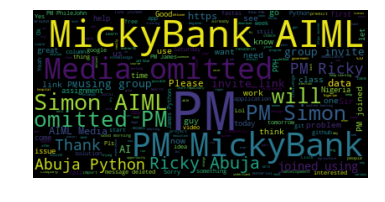

In [55]:
wc = WordCloud()
wc.generate(data_file)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")